ÌååÏù¥ÌÜ†ÏπòÎ°ú best_cnn_model.pth(Í∞ÄÏ§ëÏπò)Î•º Î∂àÎü¨ÏôÄÎ≥¥Ïûê!\
ÌååÏù¥ÌÜ†ÏπòÎäî Í∞ÄÏ§ëÏπòÎßå Í∞ÄÎä•

In [1]:
import torch
import torch.nn as nn

In [2]:
model = nn.Sequential()

# Ìï©ÏÑ±Í≥± Ï∏µ 1
model.add_module("conv1", nn.Conv2d(1, 32, 3, padding='same'))
model.add_module("relu1", nn.ReLU())  # ÌíÄÎßÅ Ï†ÑÏóê ÌôúÏÑ±Ìôî Ìï®Ïàò ÏÑ§Ï†ïÌïòÎäî Í≤ÉÏùÑ ÏûäÏßÄ ÎßêÏûê!
                                      # - ÌôúÏÑ±Ìôî Ìï®ÏàòÍπåÏßÄ ÌÜµÍ≥º ÏãúÌÇ§Í≥† ÎÇòÏÑúÏïº ÌäπÏÑ±ÎßµÏù¥ ÎßåÎì§Ïñ¥ÏßÑÎã§
model.add_module("pool1", nn.MaxPool2d(2))

# Ìï©ÏÑ±Í≥± Ï∏µ 2
model.add_module("conv2", nn.Conv2d(32, 64, 3, padding='same'))
model.add_module("relu2", nn.ReLU())
model.add_module("pool2", nn.MaxPool2d(2))

# Flatten Ï∏µ
model.add_module('flatten', nn.Flatten())

# ÏùÄÎãâÏ∏µ ÏûÖÎ†• ÌÅ¨Í∏∞ ÌôïÏù∏
outputs = model(torch.ones(1, 1, 28, 28))  # Í∞ÄÏßú Îç∞Ïù¥ÌÑ∞Î•º ÎÑ£Ïñ¥ÏÑú ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Í∞Ä Î™á Í∞úÏù∏ÏßÄ ÌôïÏù∏
print(outputs.shape)  # torch.Size([1, 3136]) -> 3136Í∞ú

# ÏùÄÎãâÏ∏µ
model.add_module('dense1', nn.Linear(7 * 7 * 64, 100))  # 3136, 100
model.add_module("relu3", nn.ReLU())
model.add_module("dropout", nn.Dropout(0.3))

# Ï∂úÎ†•Ï∏µ
model.add_module("dense2", nn.Linear(100, 10))

torch.Size([1, 3136])


In [3]:
model.load_state_dict(torch.load('best_cnn_model.pth', weights_only=True))

<All keys matched successfully>

#### Î™®Îç∏Ïùò Ï∏µ Î™©Î°ùÏùÑ ÌôïÏù∏Ìï¥Î≥¥Ïûê
Î∞©Î≤ï1) `.children()`: generate Í∞ùÏ≤¥, Î™®Îì† Ï∏µÏùò Ï†ïÎ≥¥Î•º Î∞òÌôòÌïúÎã§.

Î∞©Î≤ï2) `.Ï∏µ_Ïù¥Î¶Ñ`: Ìï¥Îãπ Ïù¥Î¶ÑÏùÑ Í∞ÄÏßÑ Ï∏µÏùò Ï†ïÎ≥¥ Î∞òÌôò

Î∞©Î≤ï3) `model.named_children()`: ÌäúÌîå Î∞òÌôò -> (Ï∏µ_Ïù¥Î¶Ñ, Ï∏µ_Í∞ùÏ≤¥)

In [ ]:
# Î∞©Î≤ï 1
layers = [layer for layer in model.children()]
layers

[Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same),
 ReLU(),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same),
 ReLU(),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=3136, out_features=100, bias=True),
 ReLU(),
 Dropout(p=0.3, inplace=False),
 Linear(in_features=100, out_features=10, bias=True)]

In [ ]:
# Î∞©Î≤ï 2
model.conv1

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [ ]:
# Î∞©Î≤ï 3
for name, layer in model.named_children():
    print("name:", name, "layer:", layer)

name: conv1 layer: Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
name: relu1 layer: ReLU()
name: pool1 layer: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
name: conv2 layer: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
name: relu2 layer: ReLU()
name: pool2 layer: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
name: flatten layer: Flatten(start_dim=1, end_dim=-1)
name: dense1 layer: Linear(in_features=3136, out_features=100, bias=True)
name: relu3 layer: ReLU()
name: dropout layer: Dropout(p=0.3, inplace=False)
name: dense2 layer: Linear(in_features=100, out_features=10, bias=True)


#### ÌäπÏÑ±Îßµ ÏãúÍ∞ÅÌôî
- ex01.ipynbÏóêÏÑú ÌñàÎçò Í≤É
- Ï≤´ Î≤àÏß∏ Conv Ï∏µÏùÑ ÌÜµÍ≥ºÌïú ÌäπÏÑ±Îßµ

In [ ]:
# Fashion MNIST Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
from torchvision.datasets import FashionMNIST
fm_train = FashionMNIST(root='.', train=True, download=True)

# Ïù¥ÎØ∏ÏßÄ ÏûÖÎ†• - Ï±ÑÎÑê Î™ÖÏãú (Î∞∞Ïπò, Ï±ÑÎÑê, ÎÜíÏù¥, ÎÑàÎπÑ)
train_input = fm_train.data

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 26.4M/26.4M [00:04<00:00, 6.52MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29.5k/29.5k [00:00<00:00, 126kB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.42M/4.42M [00:02<00:00, 2.19MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.15k/5.15k [00:00<?, ?B/s]


In [9]:
# .reshape(Î∞∞Ïπò_ÌÅ¨Í∏∞, Ï±ÑÎÑê_Ïàò, ÎÜíÏù¥, ÎÑàÎπÑ)
# -> .reshape(1, 1, 28, 28)
# -> 1Ïû•Ïùò ÌùëÎ∞± Ïù¥ÎØ∏ÏßÄ(28x28)Î•º Î∞∞ÏπòÏóê ÎÑ£ÏùÑ Ïàò ÏûàÍ≤å 4Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÌïú Í≤É
ankle_boot = train_input[0].reshape(1, 1, 28, 28) / 255.0

In [ ]:
# Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Î™®ÎìúÎ°ú Ï†ÑÌôò (Dropout, BatchNorm Îì± ÎπÑÌôúÏÑ±Ìôî)
model.eval()
with torch.no_grad():  # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ ÎπÑÌôúÏÑ±Ìôî (Ï∂îÎ°† Ïãú Î∂àÌïÑÏöîÌïú Ïó∞ÏÇ∞ Î∞©ÏßÄ)
    feature_maps = model.conv1(ankle_boot)
    feature_maps = model.relu1(feature_maps)

feature_maps.shape

torch.Size([1, 32, 28, 28])

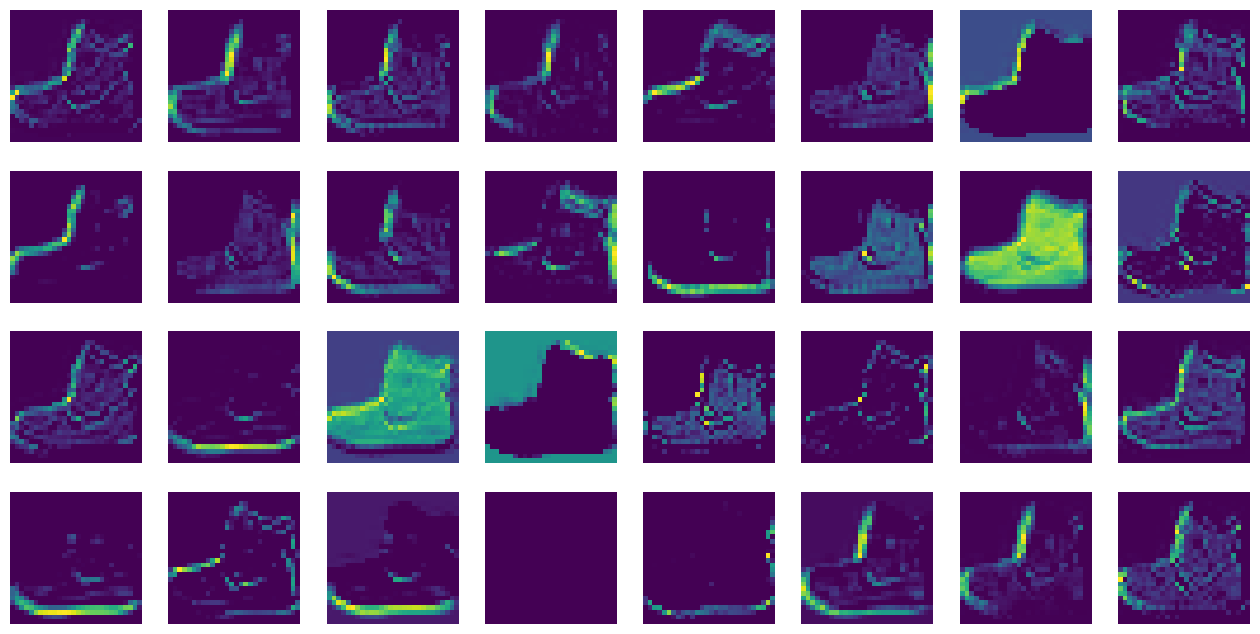

In [14]:
import matplotlib.pyplot as plt

# 4Ìñâ 8Ïó¥Ïùò ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ± (Ï¥ù 32Í∞ú), Ï†ÑÏ≤¥ Í∑∏Î¶º ÌÅ¨Í∏∞Î•º (16Ïù∏Ïπò, 8Ïù∏Ïπò)Î°ú ÏÑ§Ï†ï
_, axs = plt.subplots(4, 8, figsize=(16, 8))

# 32Í∞úÏùò feature mapÏùÑ 4Ìñâ 8Ïó¥ Í≤©ÏûêÎ°ú ÏãúÍ∞ÅÌôî
for i in range(4):
    for j in range(8):
        # feature_maps[0, k, :, :]ÏóêÏÑú kÎ≤àÏß∏ Ï±ÑÎÑêÏùò ÌäπÏÑ± Îßµ ÏãúÍ∞ÅÌôî
        axs[i, j].imshow(feature_maps[0, i * 8 + j, :, :])
        axs[i, j].axis('off')  # Ï∂ï(ÎààÍ∏àÍ≥º ÎùºÎ≤®) Ï†úÍ±∞
    
plt.show()

#### ÌäπÏÑ±Îßµ ÏãúÍ∞ÅÌôî
- Îëê Î≤àÏß∏ Conv Ï∏µÏùÑ ÌÜµÍ≥ºÌïú ÌäπÏÑ±Îßµ 64

In [ ]:
model.eval()  # Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Î™®ÎìúÎ°ú Ï†ÑÌôò (Dropout, BatchNorm Îì± ÎπÑÌôúÏÑ±Ìôî)

with torch.no_grad():  # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ ÎπÑÌôúÏÑ±Ìôî (Ï∂îÎ°† Ïãú Î∂àÌïÑÏöîÌïú Ïó∞ÏÇ∞ Î∞©ÏßÄ)
    feature_maps = model.conv1(ankle_boot)      # Ï≤´ Î≤àÏß∏ Ìï©ÏÑ±Í≥± Í≥ÑÏ∏µ(conv1)ÏùÑ ÌÜµÍ≥º ‚Üí 32Í∞ú Ï±ÑÎÑêÎ°ú Î≥ÄÌôò
    feature_maps = model.relu1(feature_maps)    # ReLU ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÅÏö© ‚Üí ÎπÑÏÑ†ÌòïÏÑ± Î∂ÄÏó¨
    feature_maps = model.pool1(feature_maps)    # MaxPooling Ï†ÅÏö© ‚Üí Í≥µÍ∞Ñ Ï∂ïÏÜå (28x28 ‚Üí 14x14)
    feature_maps = model.conv2(feature_maps)    # Îëê Î≤àÏß∏ Ìï©ÏÑ±Í≥± Í≥ÑÏ∏µ(conv2)ÏùÑ ÌÜµÍ≥º ‚Üí 64Í∞ú Ï±ÑÎÑêÎ°ú Î≥ÄÌôò
    feature_maps = model.relu2(feature_maps)    # ReLU ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÅÏö© ‚Üí ÏµúÏ¢Ö feature map ÏÉùÏÑ±


feature_maps.shape

torch.Size([1, 64, 14, 14])

In [19]:
model.eval()  # ÌèâÍ∞Ä

x = ankle_boot

with torch.no_grad():
    for name, layer in model.named_children():
        x = layer(x)
        if name == 'relu2':
            break

feature_maps = x

In [20]:
# 8Ìñâ 8Ïó¥Ïùò ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ± (Ï¥ù 64Í∞ú), Ï†ÑÏ≤¥ Í∑∏Î¶º ÌÅ¨Í∏∞Î•º (16Ïù∏Ïπò, 16Ïù∏Ïπò)Î°ú ÏÑ§Ï†ï
_, axs = plt.subplots(8, 8, figsize=(16, 16))

# 32Í∞úÏùò feature mapÏùÑ 8Ìñâ 8Ïó¥ Í≤©ÏûêÎ°ú ÏãúÍ∞ÅÌôî
for i in range(8):
    for j in range(8):
        # feature_maps[0, k, :, :]ÏóêÏÑú kÎ≤àÏß∏ Ï±ÑÎÑêÏùò ÌäπÏÑ± Îßµ ÏãúÍ∞ÅÌôî
        axs[i, j].imshow(feature_maps[0, i * 8 + j, :, :])
        axs[i, j].axis('off')  # Ï∂ï(ÎààÍ∏àÍ≥º ÎùºÎ≤®) Ï†úÍ±∞
    
plt.show()

# LeNet-5 (1998, Yann LeCun)
- ÌôúÏÑ±Ìôî Ìï®Ïàò: Sigmoid
- ÌíÄÎßÅ Î∞©Ïãù: AveragePooling(ÌèâÍ∑† ÌíÄÎßÅ) ÏÇ¨Ïö©
- ÏñïÏùÄ Íµ¨Ï°∞, ÏÜêÍ∏ÄÏî®(MNIST) Ïù∏ÏãùÏóê ÏÇ¨Ïö©
‚Äª ImageNet ÎåÄÌöå Ïù¥Ï†Ñ (Ï∞∏Í≥†: ImageNet ÎåÄÌöåÎäî 2010~2017ÎÖÑÏóê Ïó¥Î¶º)

# AlexNet (2012, ImageNet ÎåÄÌöå Ïö∞Ïäπ)
- ÌôúÏÑ±Ìôî Ìï®Ïàò: ReLU ÎèÑÏûÖ
- ÌíÄÎßÅ Î∞©Ïãù: MaxPooling(ÏµúÎåÄ ÌíÄÎßÅ)
- Ï†ïÍ∑úÌôî Í∏∞Î≤ï: Dropout ÏÇ¨Ïö©
  - ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ(Dense Layer)ÏóêÏÑú ÏùºÎ∂Ä Ïú†ÎãõÏùÑ ÎûúÎç§ÌïòÍ≤å ÎÅî ‚Üí Í≥ºÏ†ÅÌï© Î∞©ÏßÄ
- GPU Î≥ëÎ†¨ Ï≤òÎ¶¨Î°ú ÎåÄÍ∑úÎ™® Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•ò ÎèÑÏ†Ñ

# VGGNet-16 Î™®Îç∏ (2014, ImageNet ÎåÄÌöå Ï§ÄÏö∞Ïäπ)
- Í∏∞Ï°¥ "Ìï©ÏÑ±Í≥±Ï∏µ ‚Üí ÌíÄÎßÅÏ∏µ ‚Üí Ìï©ÏÑ±Í≥±Ï∏µ ‚Üí ÌíÄÎßÅÏ∏µ" Íµ¨Ï°∞ ‚ü∂ "Ìï©ÏÑ±Í≥±Ï∏µ x n ‚Üí ÌíÄÎßÅÏ∏µ" Íµ¨Ï°∞Î°ú Ïû¨Íµ¨ÏÑ±
- ÎÑ§Ìä∏ÏõåÌÅ¨Îäî **Î∏îÎ°ù Îã®ÏúÑ**Î°ú Íµ¨ÏÑ±\
: "(3x3 Ìï©ÏÑ±Í≥± x nÌöå) ‚Üí MaxPooling" ÌòïÌÉú Î∞òÎ≥µ
- ÌïòÎÇòÏùò ÌÅ∞ ÌïÑÌÑ∞(7x7, 5x5)Î•º ÏÇ¨Ïö© ‚ü∂ Ïó¨Îü¨ Í∞úÏùò 3x3 ÏûëÏùÄ ÌïÑÌÑ∞Î•º Ïó∞ÏÜçÏúºÎ°ú ÏÇ¨Ïö©\
: <span style="color:limegreen"><b>ÌååÎùºÎØ∏ÌÑ∞ Ïàò Ï†àÏïΩ</b></span>, ÎπÑÏÑ†ÌòïÏÑ± Îçî ÎßéÏù¥ ÏÇΩÏûÖ ‚Üí ÌëúÌòÑÎ†•Í≥º ÏÑ±Îä• Ìñ•ÏÉÅ

[VGGNet ÏòàÏ†ú Î∞îÎ°úÍ∞ÄÍ∏∞](vggnet.ipynb)<br>
<span style="font-size:13px">Í∞ïÏïÑÏßÄ Ïù¥ÎØ∏ÏßÄ Í≤∞Í≥º - ('n02099712', 'Labrador_retriever', np.float32(0.35698158))</span><br>
<span style="font-size:13px">Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄ Í≤∞Í≥º - ('n02123045', 'tabby', np.float32(0.43275306))</span>

> üìå <span style="color:limegreen"><b>ÌååÎùºÎØ∏ÌÑ∞ ÏàòÎ•º Ï§ÑÏù¥Îäî Í≤É</b></span>ÏùÄ ÏÜçÎèÑÏôÄ Ìö®Ïú® Î©¥ÏóêÏÑú Îß§Ïö∞ Ï§ëÏöîÌï¥Ïßê.

# GoogLeNet (2014, ImageNet ÎåÄÌöå Ïö∞Ïäπ)
- **Inception Î™®Îìà** ÎèÑÏûÖ\
  ‚Üí ÏÑúÎ°ú Îã§Î•∏ ÌÅ¨Í∏∞Ïùò Ïª§ÎÑê(1x1, 3x3, 5x5)ÏùÑ Î≥ëÎ†¨ Ï†ÅÏö©ÌïòÏó¨ Îã§ÏñëÌïú ÌäπÏßï Ï∂îÏ∂ú
- Ïó∞ÏÇ∞ Ìö®Ïú® ÎÜíÏù¥Í≥†, ÌååÎùºÎØ∏ÌÑ∞ ÏàòÎ•º Ï§ÑÏù¥Î©¥ÏÑúÎèÑ ÎÜíÏùÄ ÏÑ±Îä• ÌôïÎ≥¥

# ResNet (2015, ImageNet ÎåÄÌöå Ïö∞Ïäπ)
- ÏûîÏ∞® Î∏îÎ°ù (Residual Block ÎòêÎäî Skip Block) ÎèÑÏûÖ ‚Üí Ï†ïÎ≥¥ Ï†ÑÎã¨ Í≤ΩÎ°ú Î≥¥Ïû•
  - ÏûÖÎ†•ÏùÑ Ï∂úÎ†•Ïóê Í∑∏ÎåÄÎ°ú ÎçîÌïòÎäî **Ïä§ÌÇµ Ïó∞Í≤∞(Skip Connection)**ÏùÑ ÌÜµÌï¥, Ïã†Í≤ΩÎßùÏù¥ ÏûÖÎ†•Í≥º Ï∂úÎ†•Ïùò Ï∞®Ïù¥(ÏûîÏ∞®, Residual)Î•º ÌïôÏäµÌïòÎèÑÎ°ù Ïú†ÎèÑ.
  - Ïù¥Î•º ÌÜµÌï¥ Ï†ïÎ≥¥Í∞Ä Ï∏µÏùÑ Í±¥ÎÑàÎõ∞Î©∞ Ï†ÑÎã¨ÎêòÎØÄÎ°ú, ÍπäÏùÄ ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑúÎèÑ ÌïôÏäµÏù¥ Ïûò Ïù¥Î£®Ïñ¥Ïßê.
  - **Ïú†Ïö©Ìïú ÌäπÏßïÏù¥ Ï∏µÏùÑ Í±∞ÏπòÎ©∞ ÏôúÍ≥°ÎêòÍ±∞ÎÇò ÏïΩÌï¥ÏßÄÎäî Í≤É**ÏùÑ ÎßâÏïÑÏ§å.
- ÌôúÏÑ±Ìôî Ìï®Ïàò: ReLU
- Ï†ïÍ∑úÌôî Í∏∞Î≤ï: Î∞∞Ïπò Ï†ïÍ∑úÌôî (Batch Normalization)
  - ÌïôÏäµ ÎèÑÏ§ë Í∞Å Ï∏µÏùò ÏûÖÎ†• Î∂ÑÌè¨Í∞Ä Í≥ÑÏÜç Î≥ÄÌïòÎäî Î¨∏Ï†ú(Internal Covariate Shift)Î•º ÏôÑÌôî.
  - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïÑÎãå, **ÎØ∏ÎãàÎ∞∞Ïπò Îã®ÏúÑ**Î°ú Ï†ïÍ∑úÌôî ÏàòÌñâ. (ÌïôÏäµ ÎèÑÏ§ëÏóê Ï†ïÍ∑úÌôî)
  - ÌïôÏäµ ÏÜçÎèÑ ‚Üë, Í≥ºÏ†ÅÌï© ‚Üì
- Flatten ÎåÄÏã† GlobalAveragePooling2D ÏÇ¨Ïö©\
  ‚Üí <span style="color:limegreen"><b>ÌååÎùºÎØ∏ÌÑ∞ Í∞êÏÜå</b></span>, Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

# DenseNet
- ResNetÏùò ÌôïÏû• Î™®Îç∏
- Î™®Îì† Ïù¥Ï†Ñ Ï∏µÏùò Ï∂úÎ†•ÏùÑ ÌòÑÏû¨ Ï∏µÏóê ÏßÅÏ†ë Ïó∞Í≤∞ (Î∞ÄÏßë Ïó∞Í≤∞)
- ÌååÎùºÎØ∏ÌÑ∞ Ìö®Ïú® + Ï†ïÎ≥¥ ÌùêÎ¶Ñ Í∞úÏÑ†

# MobileNet (2017~) - Î™®Î∞îÏùº ÌôòÍ≤Ω(Í≤ΩÎüâ) Î™®Îç∏
- Í≤ΩÎüâ Î™®Îç∏ (Î™®Î∞îÏùº/ÏûÑÎ≤†ÎîîÎìú ÏµúÏ†ÅÌôî)
- Depthwise Separable Convolution ÏÇ¨Ïö©\
  ‚Üí ÍπäÏù¥Î≥Ñ Ìï©ÏÑ±Í≥± + Ï†êÎ≥Ñ Ìï©ÏÑ±Í≥±
- Ïó∞ÏÇ∞Îüâ‚Üì, ÏÜçÎèÑ‚Üë, Í≤ΩÎüâÌôî(ÌååÎùºÎØ∏ÌÑ∞ Ïàò Ï∂ïÏÜå)Ïóê Ï¥àÏ†ê

# EfficientNet (2019, Google) ‚ú®
- **Compound Scaling**: Î™®Îç∏Ïùò ÍπäÏù¥(depth), ÎÑàÎπÑ(width), Ìï¥ÏÉÅÎèÑ(resolution)Î•º **Í∑†Ìòï ÏûàÍ≤å** Ï°∞Ï†à
- ÌôúÏÑ±Ìôî Ìï®Ïàò: **Swish(Ïä§ÏúÑÏãú) Ìï®Ïàò** ÏÇ¨Ïö© (ReLUÎ≥¥Îã§ Î∂ÄÎìúÎüΩÍ≥† ÏÑ±Îä• Ïö∞Ïàò)
- ÎÜíÏùÄ Ï†ïÌôïÎèÑ + ÎÇÆÏùÄ Ïó∞ÏÇ∞Îüâ (SOTA Ìö®Ïú® Îã¨ÏÑ±)

[EfficientNet ÏòàÏ†ú (1) Î∞îÎ°úÍ∞ÄÍ∏∞](efficientnet1.ipynb)<br>
<span style="font-size:13px">Í∞ïÏïÑÏßÄ Ïù¥ÎØ∏ÏßÄ Í≤∞Í≥º - ('n02099712', 'Labrador_retriever', np.float32(0.3682936))</span><br>
<span style="font-size:13px">Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄ Í≤∞Í≥º - ('n02124075', 'Egyptian_cat', np.float32(0.35218692))</span>

[EfficientNet ÏòàÏ†ú (2) Î∞îÎ°úÍ∞ÄÍ∏∞](efficientnet1.ipynb)<br>
<span style="font-size:13px">ÌîºÏä§ÌÉÄÏπòÏò§ Ïù¥ÎØ∏ÏßÄ Í≤∞Í≥º - ('n01955084', 'chiton', np.float32(0.25582632))</span>